Bivariate Analysis


*   Bi means two, so Bivariate analysis meaning two variable analysis
*   colun can be of two types- 1)continous 2) Categorical
*   So Bivariate analysis can be of 3 types


    1.    Continous vs Continous - Correlatio coeff and VIF (variance impact factor)
    2.    Categorical vs Categorical- Chi square test
    3.    Categorical vs Continous- T test(N<30), Z Test(N>30) & ANOVA





In [ ]:
#Importing Required Libraries

from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.simplefilter('ignore')

In [ ]:
#iris dataset for classification
iris=datasets.load_iris()
#convert to dataframe
iris_pd=pd.DataFrame(iris.data)

#Feature Name
iris_pd.columns=iris.feature_names

#Target  Variable
iris_pd['Class']=iris.target

#iris_pd is the final dataset

#California Housing dataset for regresssion
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
california_pd=pd.DataFrame(housing.data)
california_pd.columns=housing.feature_names
california_pd['MedHouseVal']=housing.target

<Axes: >

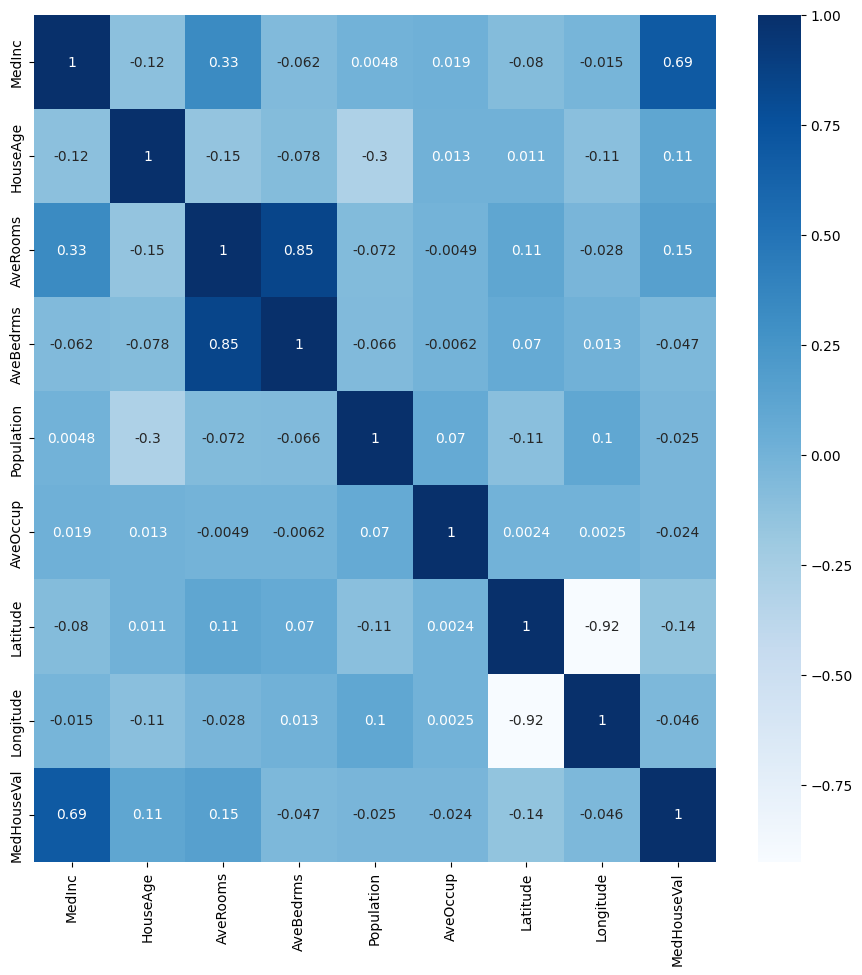

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(11,11))
sns.heatmap(california_pd.corr(method='pearson'),annot=True,cmap='Blues',ax=ax) #Default method for correlation is also pearson


### **VIFs( variance inflation Factors)**


*   It is used to measure  correlation among independent variables in least squares regression models.




**VIF = 1**: *The variable is not correlated with other variables*

**VIF between 1 and 5:** *The variable is moderately correlated with other variables*

**VIF greater than 5:** *The variable is highly correlated with other variable*

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#importing necessary libraries

def calc_vif(X):
  #to calculate vif
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)
#Remove Dependent Column first and then apply VIF

X= california_pd.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


### Categorical vs Categorical

In [ ]:
iris_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#checking the datatypes

print("Datatypes of IRIS Dataset")
iris_pd.dtypes

Datatypes of IRIS Dataset


,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
Class,int64


All datatypes are numerical, now we have to convert it into categorical

In [ ]:
iris_pd['petal width (cm)'].describe() #to understand the general statistical measures of the column

,petal width (cm)
count,150.000000
mean,1.199333
std,0.762238
min,0.100000
25%,0.300000
50%,1.300000
75%,1.800000
max,2.500000


In [ ]:
#creating a list
bin_label=['low','high']
iris_pd['bin_petal_width']=pd.qcut(iris_pd['petal width (cm)'],q=[0,0.5,1],labels=bin_label) #qcut is applied on petal width
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,bin_petal_width
0,5.1,3.5,1.4,0.2,0,low
1,4.9,3.0,1.4,0.2,0,low
2,4.7,3.2,1.3,0.2,0,low
3,4.6,3.1,1.5,0.2,0,low
4,5.0,3.6,1.4,0.2,0,low


In [ ]:
iris_pd['bin_petal_width'].value_counts() #to see how many are in low/ high category from petal width

,count
bin_petal_width,
low,78
high,72


In [ ]:
#Convert Traget Column to Categorical

iris_pd['Class']=iris_pd['Class'].astype('category')

#so the datatype now is:
print("Final Datatypes" )
iris_pd.dtypes

Final Datatypes


,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
Class,category
bin_petal_width,category


In [ ]:
# we will apply chi square test between class and bin_petal_width
contingency_table=pd.crosstab(iris_pd['bin_petal_width'],iris_pd['Class'],)
print(contingency_table)


Class             0   1   2
bin_petal_width            
low              50  28   0
high              0  22  50


In [ ]:
#Chi square Test
#So we took two caategorical columns- Petal Width(Bins) and Class
#Chi Square Hypothesis:
#Null Hypothesis:- Petal width has no effect on the class
#Alternate Hypothesis:- Petal width has no effect on class

from scipy import stats
chi2_stat,p_val,dof,ex=stats.chi2_contingency(contingency_table)
print("CHI-SQUARE Test Values")
print("Chi Square Value: ",chi2_stat)
print("P Value: ",p_val)
print("Degree of Freedom: ",dof)
print("Contigency Table")
ex

CHI-SQUARE Test Values
Chi Square Value:  100.64102564102565
P Value:  1.3998417931687032e-22
Degree of Freedom:  2
Contigency Table


array([[26., 26., 26.],
       [24., 24., 24.]])

### T **test**

The main difference between T test and Z test(in terms of when to use) is based on sample size. if sample size is less than 30 then its T test, else its Z test

In [ ]:
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,bin_petal_width
0,5.1,3.5,1.4,0.2,0,low
1,4.9,3.0,1.4,0.2,0,low
2,4.7,3.2,1.3,0.2,0,low
3,4.6,3.1,1.5,0.2,0,low
4,5.0,3.6,1.4,0.2,0,low


<Axes: xlabel='Class', ylabel='sepal length (cm)'>

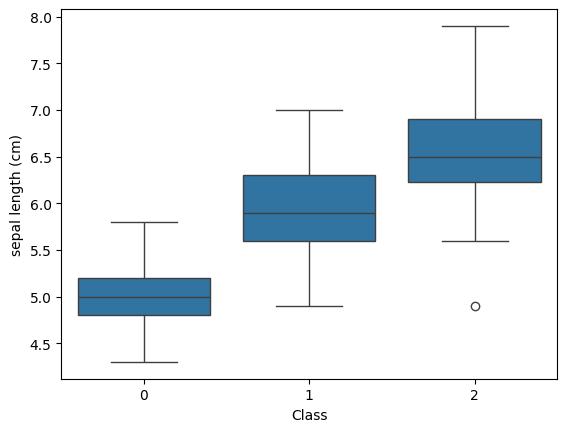

In [ ]:
sns.boxplot(x='Class',y='sepal length (cm)',data=iris_pd) #plotting a box plot for sepal length based on the class

In [ ]:
#Use Z test because the no of samples is more than 30 ( it's 150)

print("Number of samples in the set: ",len(iris_pd))
print("Therefore USE Z TEST")

ztest, pval=stests.ztest(iris_pd['Class'],iris_pd['sepal length (cm)'],alternative='two-sided')
print("Z test value is ",ztest) #ztest value
print("P value is ",pval)  #probability value

Number of samples in the set:  150
Therefore USE Z TEST
Z test value is  -50.92447470978208
P value is  0.0


In [ ]:
#we already did binning for petal width, so create a bin for sepal width
iris_pd['bin_sepal_width']=pd.qcut(iris_pd['sepal width (cm)'],q=[0,0.5,1],labels=bin_label)

#remove space,and other symbols in column name for using it in a model

iris_pd.columns=iris_pd.columns.str.replace(' ','')
iris_pd.columns=iris_pd.columns.str.replace('(cm)','')
iris_pd.columns=iris_pd.columns.str.replace('[^a-zA-z]','')

In [ ]:
#Now making a Regression model

iris_pd['Class']=iris_pd['Class'].astype('int')

model=ols('Class ~C(bin_petal_width) *C(bin_sepal_width)',iris_pd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.55e-48
Time:                        07:00:54   Log-Likelihood:                -67.119
No. Observations:                 150   AIC:                             142.2
Df Residuals:                     146   BIC:                             154.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 0.7778      0.064     12.163      0.000       0.651       0.904
C(bin_petal_width)[T.high]                                0.9243      0.085     10.878      0.000       0.756       1.092
C(bin_sepal_width)[T.high]                               -0.7778      0.087     -8.925      0.000      -0.950      -0.606
C(bin_petal_width)[T.high]:C(bin_sepal_width)[T.high]     0.7557      0.129      5.862      0.000       0.501       1.010
==============================================================================
Omnibus:                       25.008   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.614
Skew:                          -1.154   Prob(JB):                     5.02e-08
Kurtosis:                       2.776   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Anova Ouput

sm.stats.anova_lm(model,typ=2)  #Type=2 because there are two independent columns


,sum_sq,df,F,PR(>F)
C(bin_petal_width),56.590258,1.0,384.430208,9.721071e-43
C(bin_sepal_width),6.675232,1.0,45.346339,3.528236e-10
C(bin_petal_width):C(bin_sepal_width),5.059254,1.0,34.368636,2.919685e-08
Residual,21.492009,146.0,NaN,NaN
